In [108]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [109]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.decomposition import PCA

### Data ingestion 

In [110]:
warnings.filterwarnings("ignore")

In [111]:
# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets



In [112]:
# metadata
print(cdc_diabetes_health_indicators.metadata)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [113]:
# variable information
print(cdc_diabetes_health_indicators.variables)

                    name     role     type      demographic  \
0                     ID       ID  Integer             None   
1        Diabetes_binary   Target   Binary             None   
2                 HighBP  Feature   Binary             None   
3               HighChol  Feature   Binary             None   
4              CholCheck  Feature   Binary             None   
5                    BMI  Feature  Integer             None   
6                 Smoker  Feature   Binary             None   
7                 Stroke  Feature   Binary             None   
8   HeartDiseaseorAttack  Feature   Binary             None   
9           PhysActivity  Feature   Binary             None   
10                Fruits  Feature   Binary             None   
11               Veggies  Feature   Binary             None   
12     HvyAlcoholConsump  Feature   Binary             None   
13         AnyHealthcare  Feature   Binary             None   
14           NoDocbcCost  Feature   Binary             

In [114]:
# Merge them into a single DataFrame
data = X.copy()
data['Diabetes_binary'] = y

In [115]:
# Dimensionalidad del dataframe
print(data.shape)

(253680, 22)


In [117]:
data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


In [118]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0
Veggies,253680.0,0.811420,0.391175,0.0,1.0,1.0,1.0,1.0


### Verificar que no existan campos nulos

In [119]:
print(data.isnull().sum())

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64


In [120]:
print(data.duplicated().sum())

24206


In [65]:
#data.drop_duplicates(inplace=True)

### Verificar el tipo de datos

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

### Determinar aquellas columnas que indiquen el tipo de dato (categórico, binario)

In [122]:
# Automatically find binary columns
binary_columns = [col for col in data.columns if set(data[col].unique()).issubset({0, 1})]

# Convert found binary columns to bool
for col in binary_columns:
    data[col] = data[col].astype('bool')

# List of categorical columns to convert
categorical_columns = ['GenHlth', 'Age', 'Education', 'Income']

# Convert specified columns to category
for col in categorical_columns:
    data[col] = data[col].astype('category')

# Check the data types
print(data.dtypes)

HighBP                      bool
HighChol                    bool
CholCheck                   bool
BMI                        int64
Smoker                      bool
Stroke                      bool
HeartDiseaseorAttack        bool
PhysActivity                bool
Fruits                      bool
Veggies                     bool
HvyAlcoholConsump           bool
AnyHealthcare               bool
NoDocbcCost                 bool
GenHlth                 category
MentHlth                   int64
PhysHlth                   int64
DiffWalk                    bool
Sex                         bool
Age                     category
Education               category
Income                  category
Diabetes_binary             bool
dtype: object


### Definición de funciones

In [80]:
# EDA Functions
import math
# 1. Summary Statistics
def summary_statistics(data):
    print("Summary Statistics:")
    print(data.describe(include='all'))

# 2. Distribution of Numeric Variables
def plot_numeric_distributions(data):
    numeric_columns = data.select_dtypes(include=['int64']).columns
    n_cols = 3  # Number of columns in the grid
    n_rows = math.ceil(len(numeric_columns) / n_cols)  # Calculate rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(numeric_columns):
        sns.histplot(data[col], bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True)

    # Hide any extra subplots that are not used
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# 3. Count Plots for Binary Variables against the Target
def plot_binary_counts(data, target):
    binary_columns = data.select_dtypes(include=['bool']).columns
    n_cols = 3  # Number of columns in the grid
    n_rows = math.ceil(len(binary_columns) / n_cols)  # Calculate rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(binary_columns):
        sns.countplot(x=data[col], hue=data[target], ax=axes[i])
        axes[i].set_title(f'Count of {col} by {target}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].legend(title=target)
        axes[i].grid(True)

    # Hide any extra subplots that are not used
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# 4. Box Plots for Continuous Variables by Target Variable
def plot_boxplots(data, target):
    numeric_columns = data.select_dtypes(include=['int64']).columns
    n_cols = 3  # Number of columns in the grid
    n_rows = math.ceil(len(numeric_columns) / n_cols)  # Calculate rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, num_col in enumerate(numeric_columns):
        sns.boxplot(x=data[target], y=data[num_col], ax=axes[i])
        axes[i].set_title(f'Boxplot of {num_col} by {target}')
        axes[i].set_xlabel(target)
        axes[i].set_ylabel(num_col)
        axes[i].grid(True)

    # Hide any extra subplots that are not used
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# 5. Crosstabulation for Categorical Variables against the Target
def plot_crosstab(data, target):
    categorical_columns = data.select_dtypes(include=['category']).columns
    for cat_col in categorical_columns:
        crosstab = pd.crosstab(data[cat_col], data[target])
        print(f'Crosstab for {cat_col} vs {target}:')
        print(crosstab)
        sns.heatmap(crosstab, annot=True, fmt="d", cmap='Blues')
        plt.title(f'Crosstab Heatmap of {cat_col} by {target}')
        plt.ylabel(cat_col)
        plt.xlabel(target)
        plt.show()

# 6. Correlation Heatmap for Numeric Variables
def plot_correlation_heatmap(data):
    numeric_data = data.select_dtypes(include=['int64'])
    correlation_matrix = numeric_data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Heatmap')
    plt.show()

### Resumen estadístico

In [123]:
# Run EDA Functions
summary_statistics(data)

Summary Statistics:
        HighBP HighChol CholCheck            BMI  Smoker  Stroke  \
count   253680   253680    253680  253680.000000  253680  253680   
unique       2        2         2            NaN       2       2   
top      False    False      True            NaN   False   False   
freq    144851   146089    244210            NaN  141257  243388   
mean       NaN      NaN       NaN      28.382364     NaN     NaN   
std        NaN      NaN       NaN       6.608694     NaN     NaN   
min        NaN      NaN       NaN      12.000000     NaN     NaN   
25%        NaN      NaN       NaN      24.000000     NaN     NaN   
50%        NaN      NaN       NaN      27.000000     NaN     NaN   
75%        NaN      NaN       NaN      31.000000     NaN     NaN   
max        NaN      NaN       NaN      98.000000     NaN     NaN   

       HeartDiseaseorAttack PhysActivity  Fruits Veggies  ... NoDocbcCost  \
count                253680       253680  253680  253680  ...      253680   
unique   

### Distribución de los datos numéricos

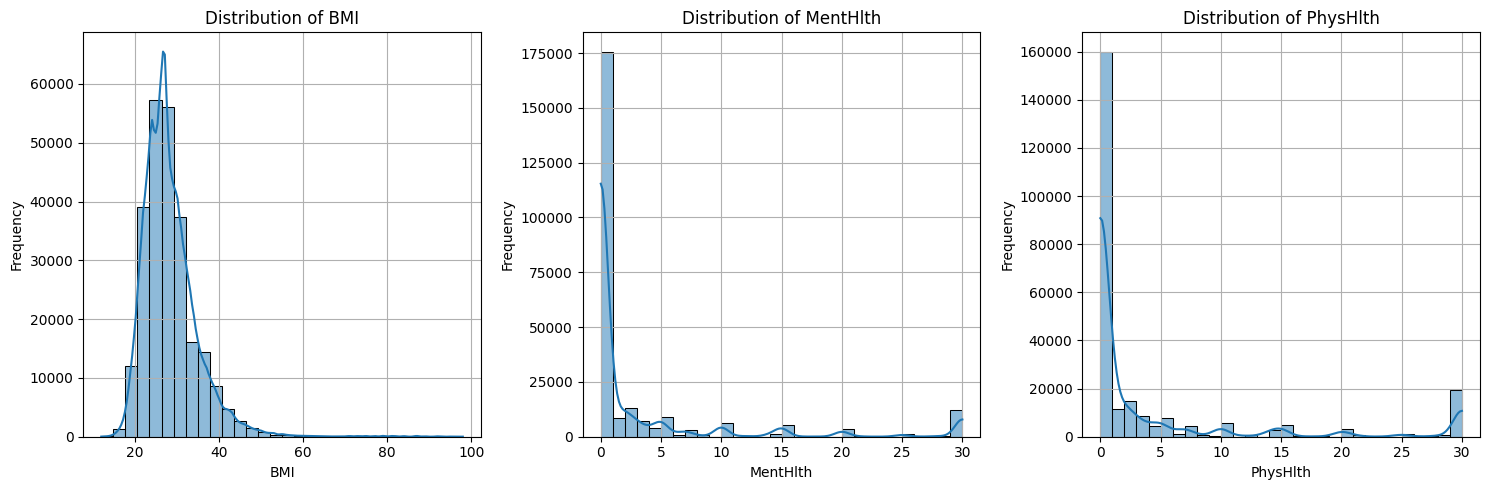

In [94]:
plot_numeric_distributions(data)

### Conteo de los datos binarios

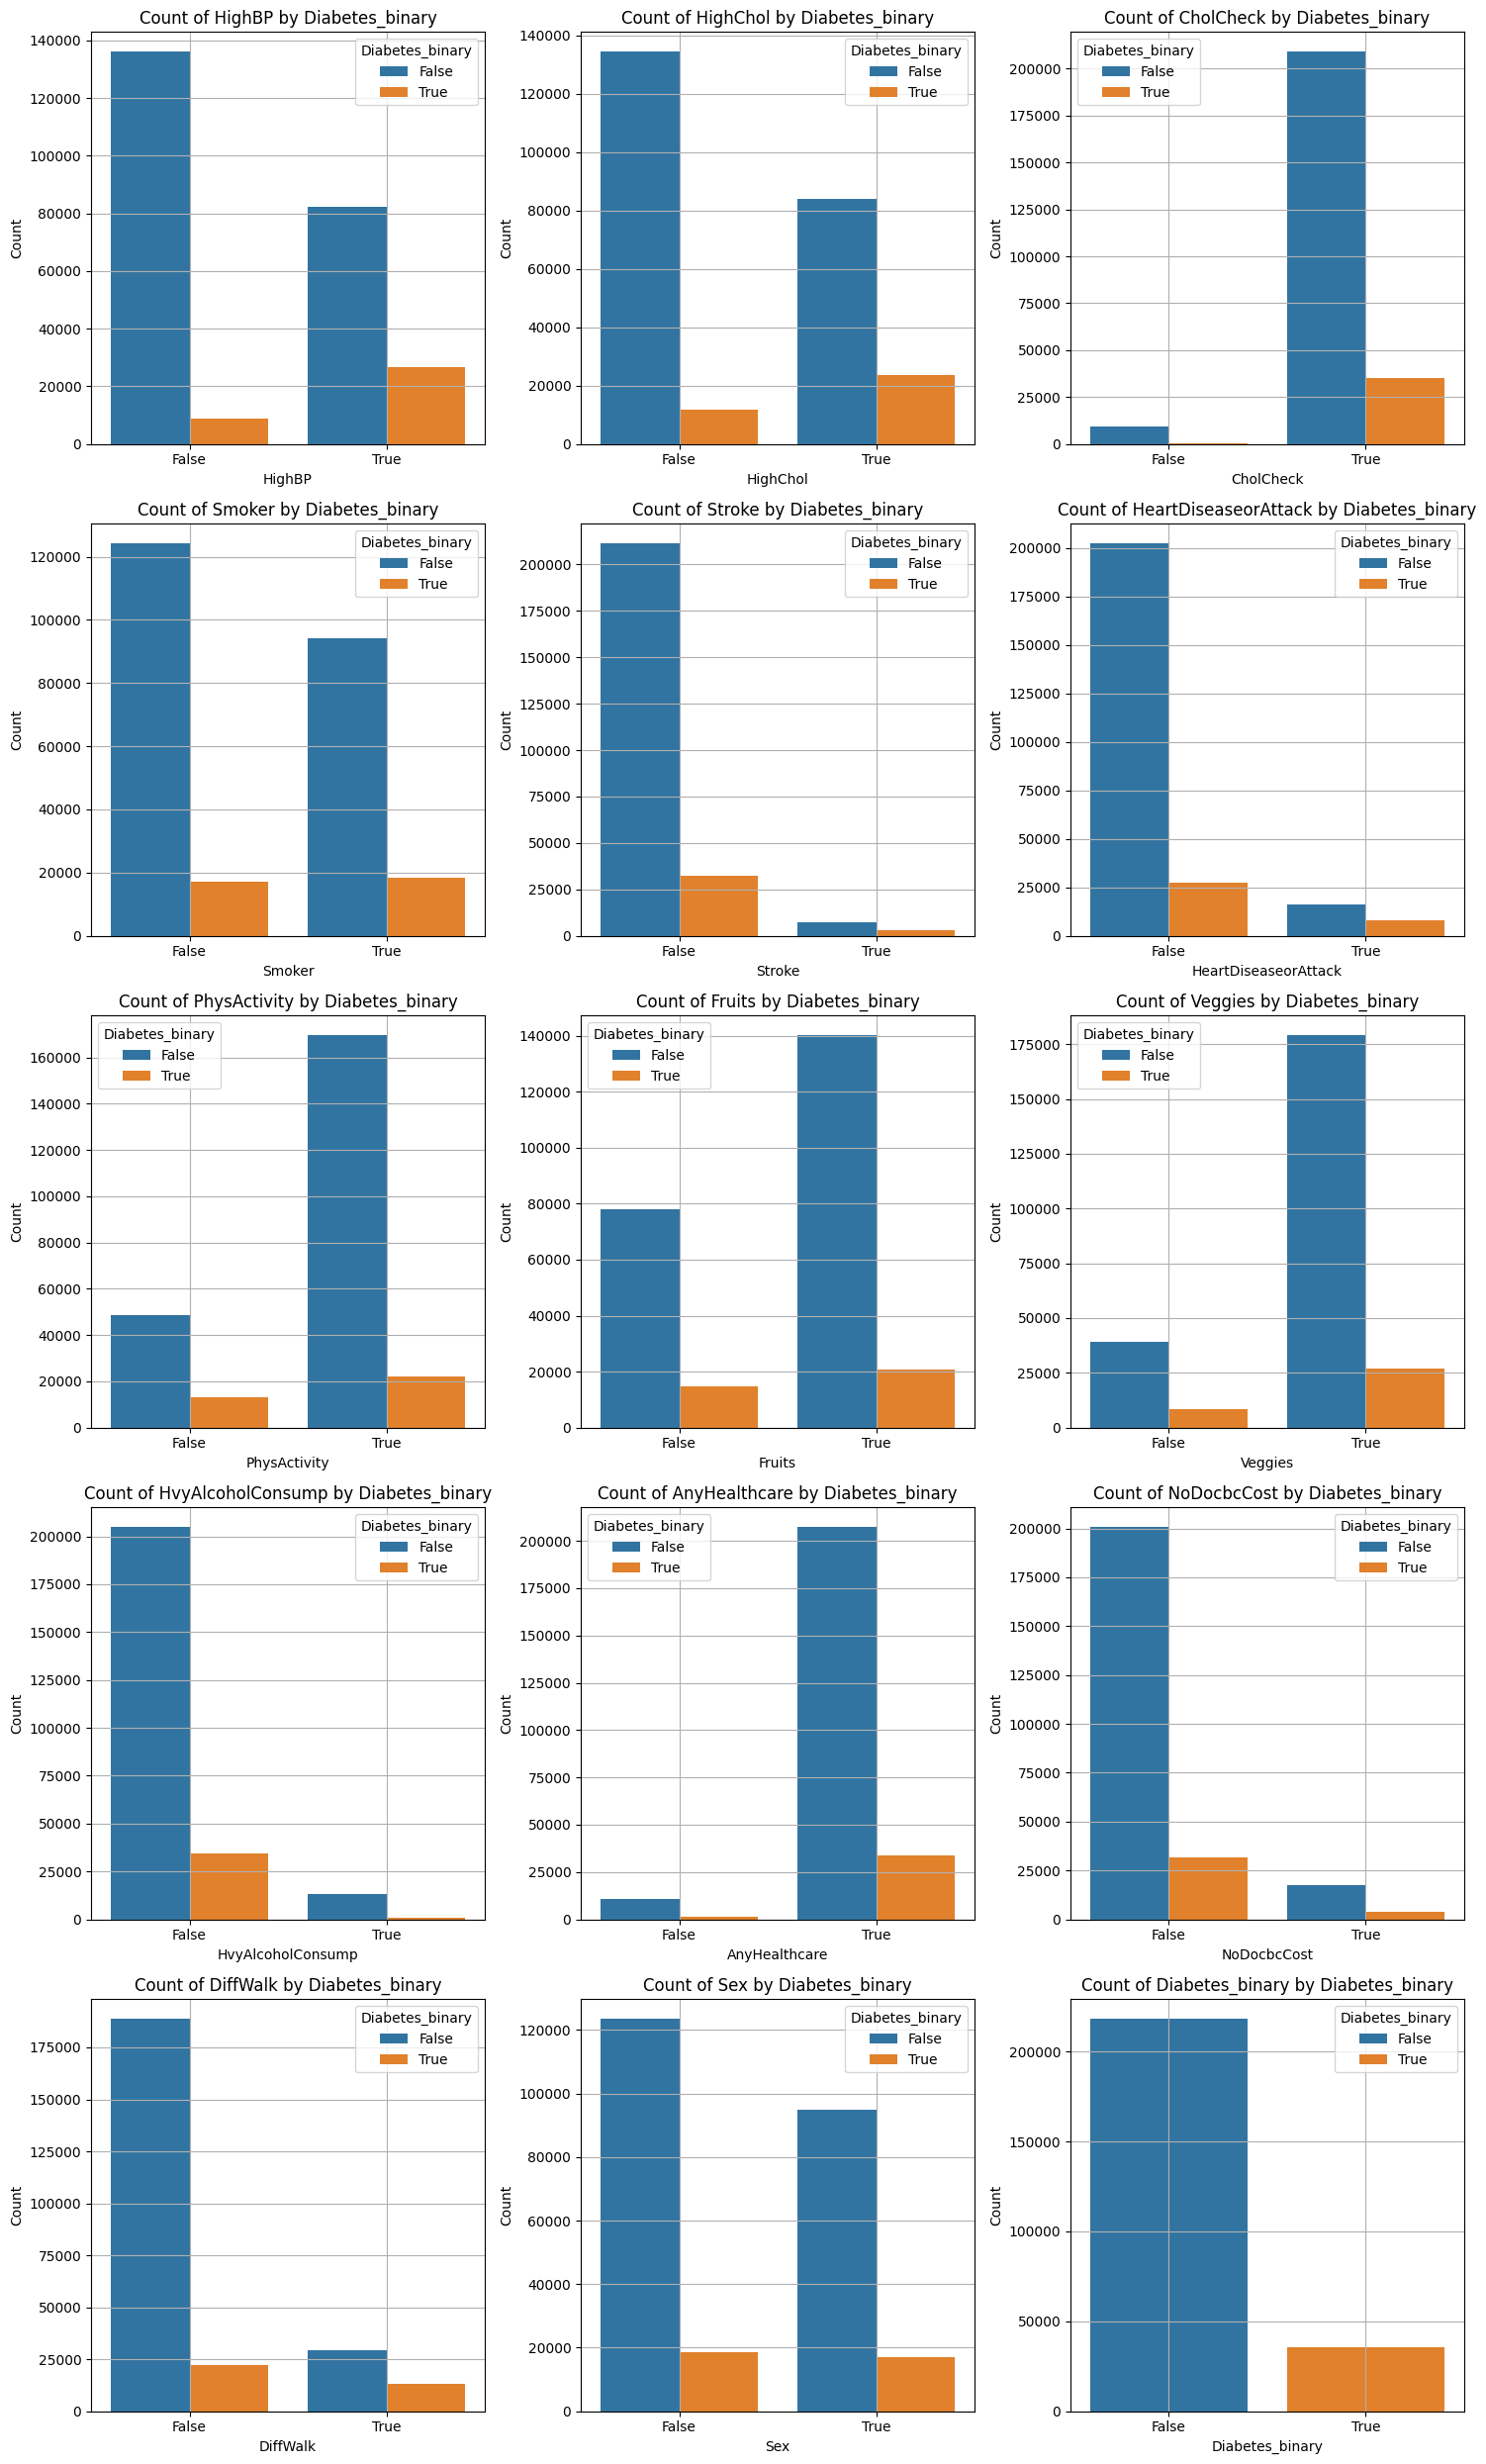

In [28]:
plot_binary_counts(data, 'Diabetes_binary')

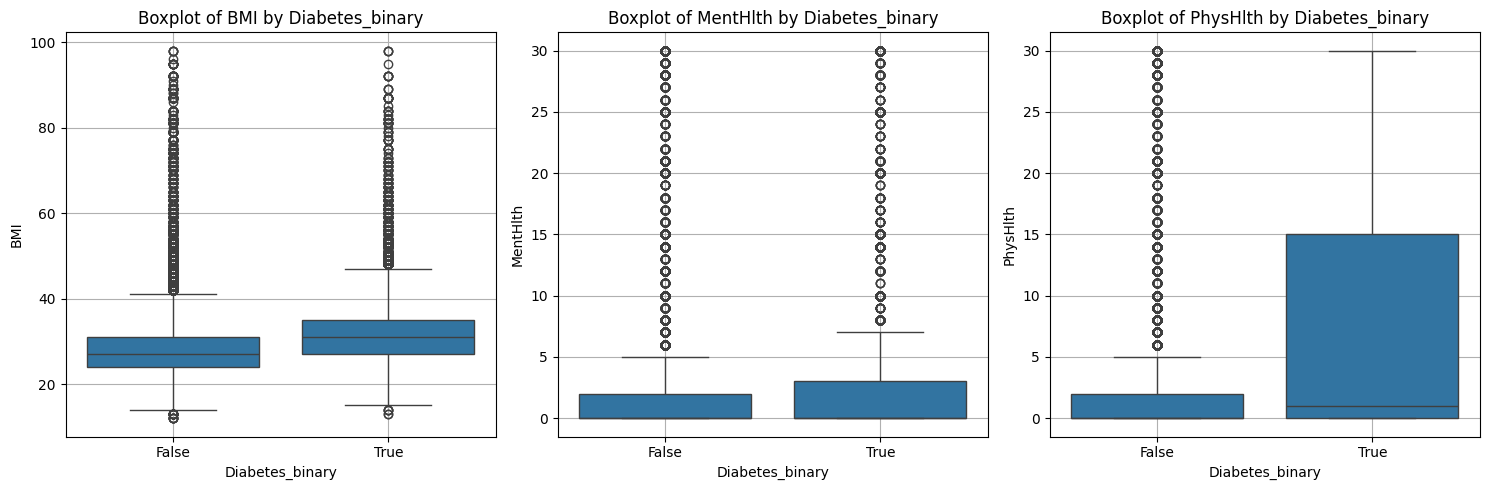

In [29]:
plot_boxplots(data, 'Diabetes_binary')

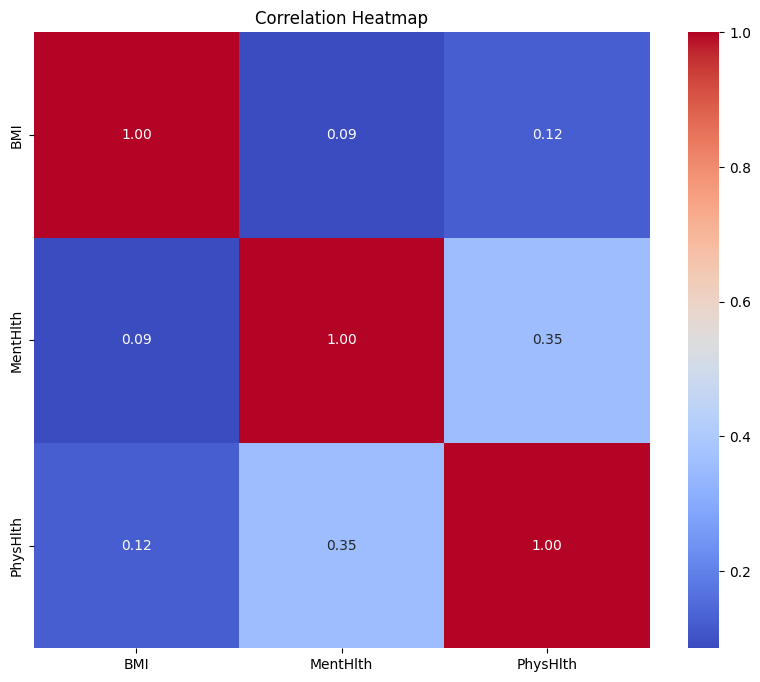

In [124]:
#plot_crosstab(data, 'Diabetes_binary')
plot_correlation_heatmap(data)

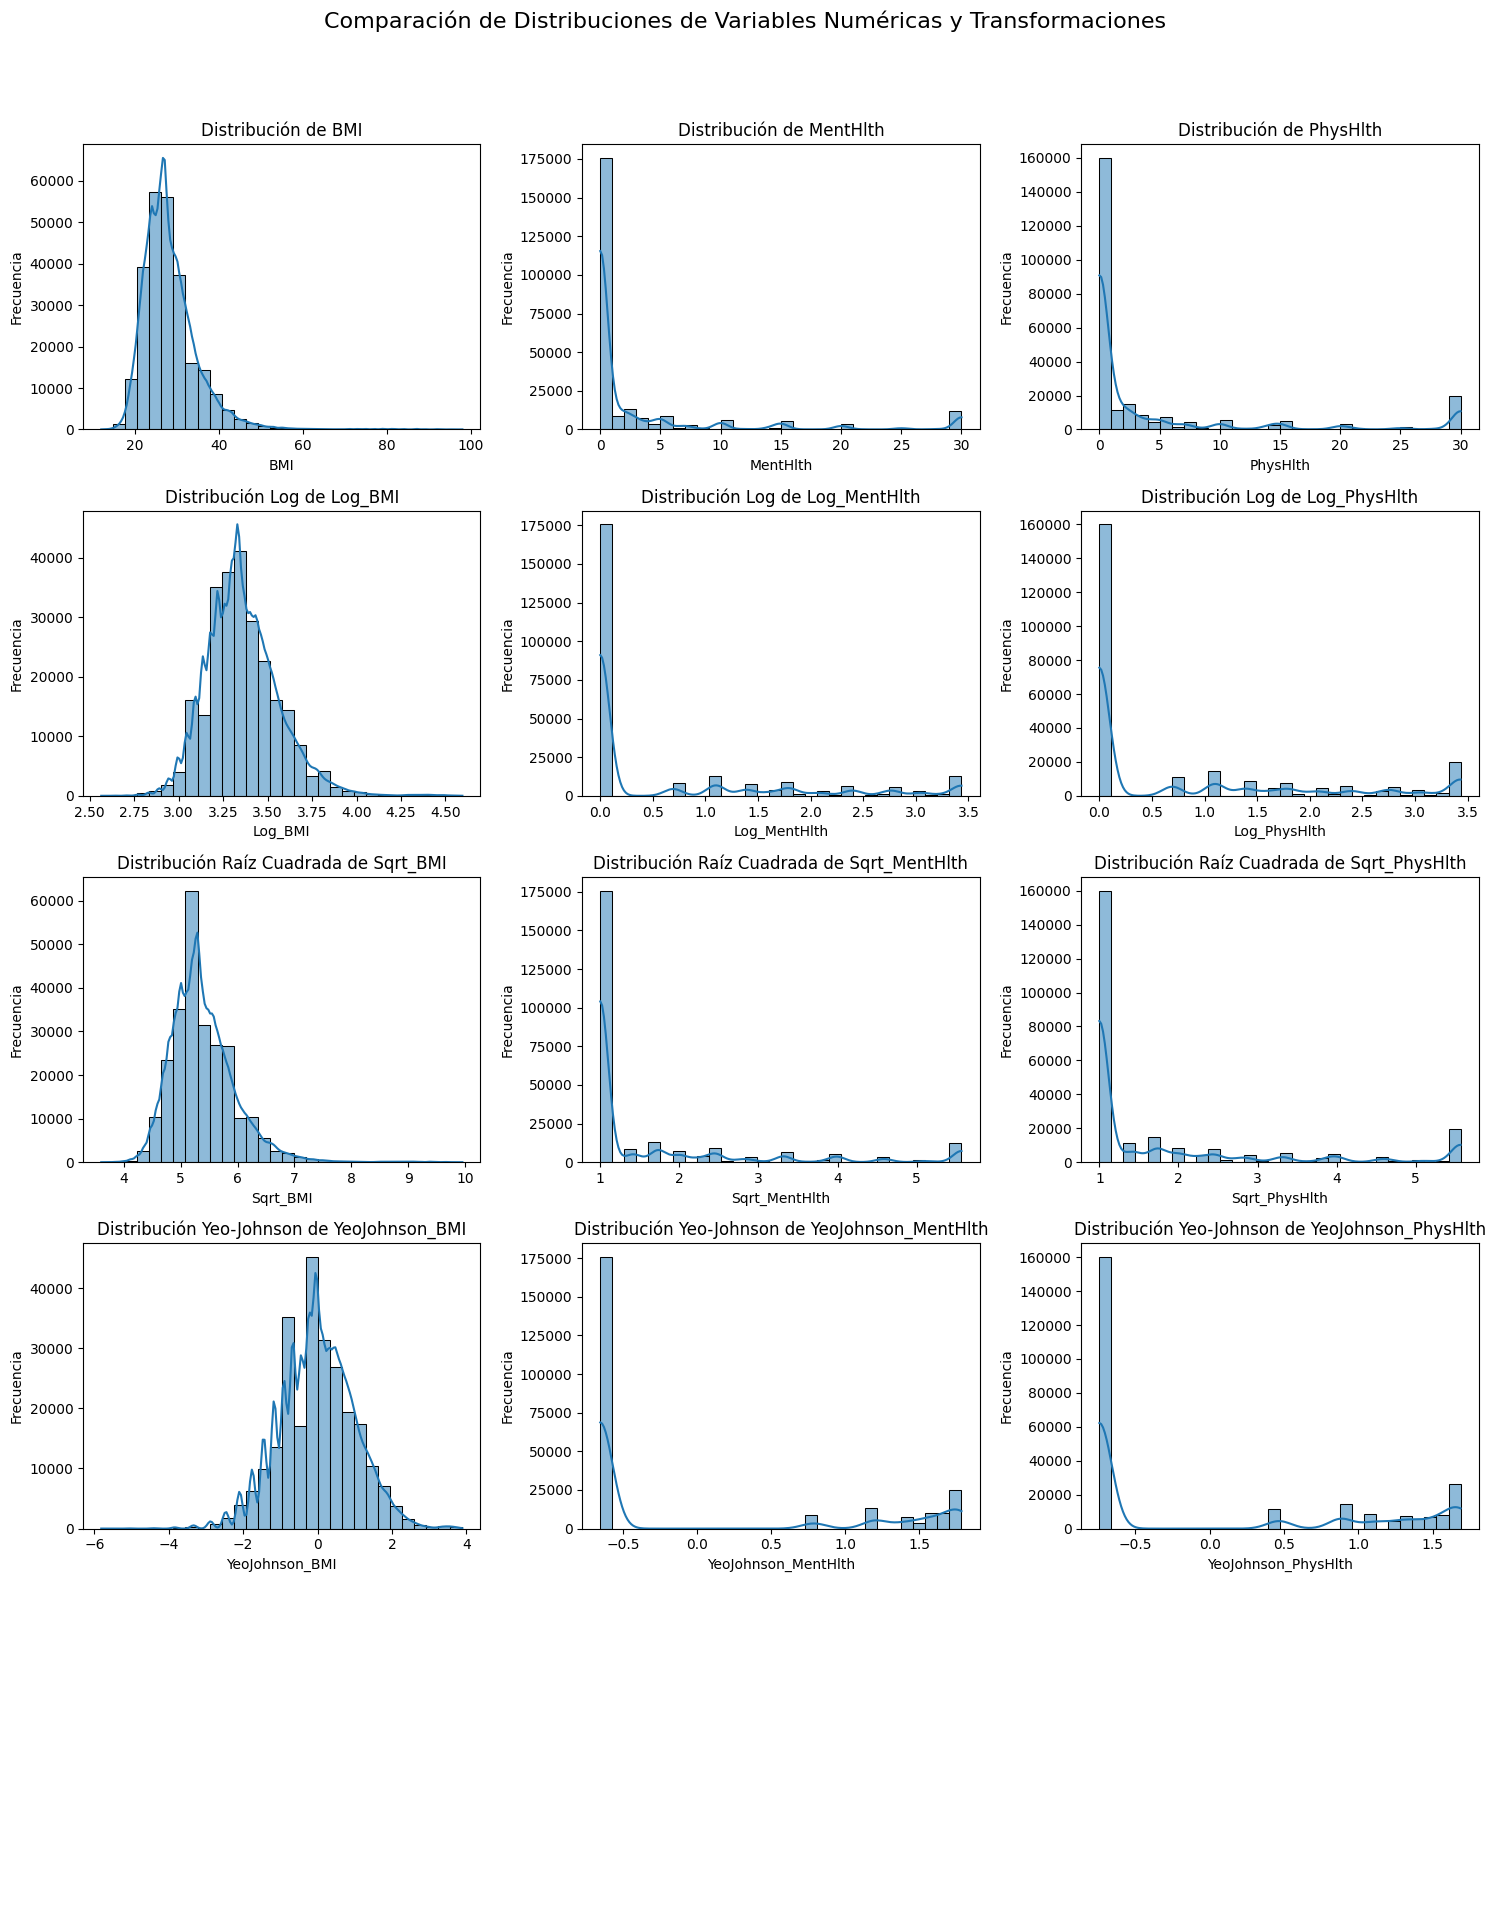

In [127]:
# Crear un DataFrame temporal para las transformaciones
temp_data = data.copy()

# Crear las transformaciones en el DataFrame temporal
temp_data['Log_BMI'] = np.log(temp_data['BMI'] + 1)
temp_data['Log_MentHlth'] = np.log(temp_data['MentHlth'] + 1)
temp_data['Log_PhysHlth'] = np.log(temp_data['PhysHlth'] + 1)

temp_data['Sqrt_BMI'] = np.sqrt(temp_data['BMI'] + 1)
temp_data['Sqrt_MentHlth'] = np.sqrt(temp_data['MentHlth'] + 1)
temp_data['Sqrt_PhysHlth'] = np.sqrt(temp_data['PhysHlth'] + 1)

# Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
temp_data[['YeoJohnson_BMI', 'YeoJohnson_MentHlth', 'YeoJohnson_PhysHlth']] = pt.fit_transform(temp_data[['BMI', 'MentHlth', 'PhysHlth']])

# Configurar la figura para múltiples subgráficas
fig, axes = plt.subplots(5, 3, figsize=(15, 20))
fig.suptitle('Comparación de Distribuciones de Variables Numéricas y Transformaciones', fontsize=16)

# Originales
for i, col in enumerate(['BMI', 'MentHlth', 'PhysHlth']):
    sns.histplot(data[col], bins=30, kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'Distribución de {col}')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Frecuencia')

# Transformación Logarítmica
for i, col in enumerate(['Log_BMI', 'Log_MentHlth', 'Log_PhysHlth']):
    sns.histplot(temp_data[col], bins=30, kde=True, ax=axes[1, i])
    axes[1, i].set_title(f'Distribución Log de {col}')
    axes[1, i].set_xlabel(col)
    axes[1, i].set_ylabel('Frecuencia')

# Transformación de Raíz Cuadrada
for i, col in enumerate(['Sqrt_BMI', 'Sqrt_MentHlth', 'Sqrt_PhysHlth']):
    sns.histplot(temp_data[col], bins=30, kde=True, ax=axes[2, i])
    axes[2, i].set_title(f'Distribución Raíz Cuadrada de {col}')
    axes[2, i].set_xlabel(col)
    axes[2, i].set_ylabel('Frecuencia')

# Transformación Yeo-Johnson
for i, col in enumerate(['YeoJohnson_BMI', 'YeoJohnson_MentHlth', 'YeoJohnson_PhysHlth']):
    sns.histplot(temp_data[col], bins=30, kde=True, ax=axes[3, i])
    axes[3, i].set_title(f'Distribución Yeo-Johnson de {col}')
    axes[3, i].set_xlabel(col)
    axes[3, i].set_ylabel('Frecuencia')

# Ocupando el espacio en la última fila (puedes ajustar o agregar más gráficas)
for ax in axes[4]:
    ax.axis('off')  # O puedes agregar otras gráficas aquí

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar layout
plt.show()


In [128]:
# Inicializa el codificador
label_encoder = LabelEncoder()

# Aplica el Label Encoding a las columnas ordinales
data['GenHlth'] = label_encoder.fit_transform(data['GenHlth'])
data['Age'] = label_encoder.fit_transform(data['Age'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Income'] = label_encoder.fit_transform(data['Income'])

# Muestra el DataFrame transformado
print(data[['GenHlth', 'Age', 'Education','Income']])

        GenHlth  Age  Education  Income
0             4    8          3       2
1             2    6          5       0
2             4    8          3       7
3             1   10          2       5
4             1   10          4       3
...         ...  ...        ...     ...
253675        2    4          5       6
253676        3   10          1       3
253677        0    1          4       1
253678        2    6          4       0
253679        1    8          5       1

[253680 rows x 4 columns]


In [129]:
# Aplicar Yeo-Johnson y reemplazar las columnas originales
pt = PowerTransformer(method='yeo-johnson')
data[['BMI', 'MentHlth', 'PhysHlth']] = pt.fit_transform(data[['BMI', 'MentHlth', 'PhysHlth']])

# Estandarizar las variables transformadas y reemplazar las columnas originales
scaler = StandardScaler()
data[['BMI', 'MentHlth', 'PhysHlth']] = scaler.fit_transform(data[['BMI', 'MentHlth', 'PhysHlth']])

# Mostrar el DataFrame transformado y estandarizado
print(data[['BMI', 'MentHlth', 'PhysHlth']])

             BMI  MentHlth  PhysHlth
0       1.638596  1.756345  1.600664
1      -0.445654 -0.656074 -0.740983
2       0.134514  1.783950  1.687864
3      -0.045740 -0.656074 -0.740983
4      -0.668354  1.387448 -0.740983
...          ...       ...       ...
253675  2.043198 -0.656074  1.316475
253676 -2.467499 -0.656074 -0.740983
253677  0.134514 -0.656074 -0.740983
253678 -0.908655 -0.656074 -0.740983
253679 -0.445654 -0.656074 -0.740983

[253680 rows x 3 columns]


In [130]:
# Check the data types
print(data.dtypes)

HighBP                     bool
HighChol                   bool
CholCheck                  bool
BMI                     float64
Smoker                     bool
Stroke                     bool
HeartDiseaseorAttack       bool
PhysActivity               bool
Fruits                     bool
Veggies                    bool
HvyAlcoholConsump          bool
AnyHealthcare              bool
NoDocbcCost                bool
GenHlth                   int64
MentHlth                float64
PhysHlth                float64
DiffWalk                   bool
Sex                        bool
Age                       int64
Education                 int64
Income                    int64
Diabetes_binary            bool
dtype: object


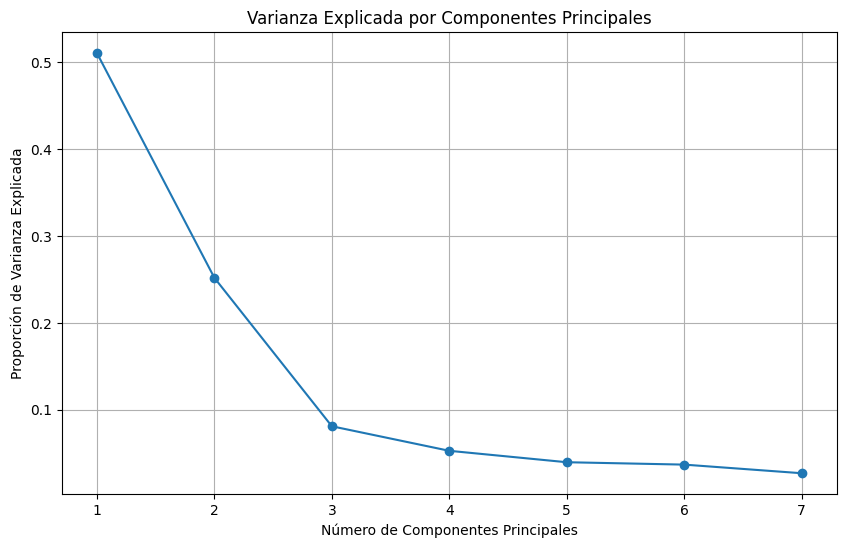

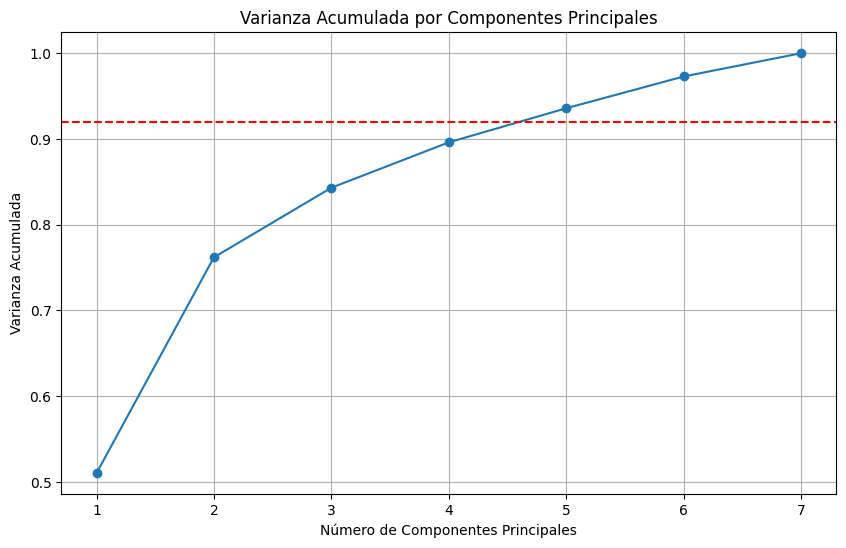

In [131]:
# Seleccionar características para PCA (variables ya transformadas y escaladas)
X = data[['BMI', 'MentHlth', 'PhysHlth', 'GenHlth', 'Age', 'Education', 'Income']]

# Inicializa PCA y ajusta el modelo
pca = PCA()
pca.fit(X)

# Variancia explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Crea un gráfico de codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Varianza Explicada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.grid()
plt.show()

# Crea un gráfico de varianza acumulada
plt.figure(figsize=(10, 6))
cumulative_variance = explained_variance.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Varianza Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.grid()
plt.axhline(y=0.92, color='r', linestyle='--')  # Umbral del 92%
plt.show()

In [132]:
# Seleccionar características para PCA (variables ya transformadas y escaladas)
X = data[['BMI', 'MentHlth', 'PhysHlth', 'GenHlth', 'Age', 'Education', 'Income']]

# Aplicar PCA
pca = PCA(n_components=5)  # Elegir cuántas componentes principales mantener
X_pca = pca.fit_transform(X)

# Convertir el resultado a un DataFrame
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(5)])

# Unir las componentes principales con el DataFrame original, excluyendo las variables originales
final_df = pd.concat([data.drop(columns=['BMI', 'MentHlth', 'PhysHlth', 'GenHlth', 'Age', 'Education', 'Income']).reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)

# Mostrar el DataFrame final
print(final_df.head())

   HighBP  HighChol  CholCheck  Smoker  Stroke  HeartDiseaseorAttack  \
0    True      True       True    True   False                 False   
1   False     False      False    True   False                 False   
2    True      True       True   False   False                 False   
3    True     False       True   False   False                 False   
4    True      True       True   False   False                 False   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
0         False   False     True              False           True   
1          True   False    False              False          False   
2         False    True    False              False           True   
3          True    True     True              False           True   
4          True    True     True              False           True   

   NoDocbcCost  DiffWalk    Sex  Diabetes_binary       PC1       PC2  \
0        False      True  False            False  1.694009 -4.000470   
1 

In [136]:
data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,True,True,True,1.638596,True,False,False,False,False,True,...,False,4,1.756345,1.600664,True,False,8,3,2,False
1,False,False,False,-0.445654,True,False,False,True,False,False,...,True,2,-0.656074,-0.740983,False,False,6,5,0,False
2,True,True,True,0.134514,False,False,False,False,True,False,...,True,4,1.783950,1.687864,True,False,8,3,7,False
3,True,False,True,-0.045740,False,False,False,True,True,True,...,False,1,-0.656074,-0.740983,False,False,10,2,5,False
4,True,True,True,-0.668354,False,False,False,True,True,True,...,False,1,1.387448,-0.740983,False,False,10,4,3,False


In [138]:
def true_false_to_one_hot(df):
    return df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

In [139]:
df_converted = true_false_to_one_hot(data)

In [140]:
df_converted.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,1.638596,1,0,0,0,0,1,...,0,4,1.756345,1.600664,1,0,8,3,2,0
1,0,0,0,-0.445654,1,0,0,1,0,0,...,1,2,-0.656074,-0.740983,0,0,6,5,0,0
2,1,1,1,0.134514,0,0,0,0,1,0,...,1,4,1.783950,1.687864,1,0,8,3,7,0
3,1,0,1,-0.045740,0,0,0,1,1,1,...,0,1,-0.656074,-0.740983,0,0,10,2,5,0
4,1,1,1,-0.668354,0,0,0,1,1,1,...,0,1,1.387448,-0.740983,0,0,10,4,3,0


In [143]:
ytv = df_converted['Diabetes_binary']

### clases no balanceadas: tengo un 13% de pacientes con diabetes diagnosticado. Necesito un modelo con clases no balanceadas y luego otro modelo donde las clases estén balanceadas

In [145]:
print(ytv.sum()/ytv.shape[0])

0.13933301797540207


In [133]:
correlation_matrix = X.corr()

## Modelos de ML

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [164]:
def my_accuracy(yreal, ypred):
  vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
  tot = confusion_matrix(yreal, ypred).sum()
  return (vp+vn)/tot

def my_recall(yreal, ypred):
  vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
  return vp/(vp+fn)

def my_gmean(yreal, ypred):
  vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
  especificidad = vn / (vn+fp)
  recall = my_recall(yreal, ypred)
  return np.sqrt(recall*especificidad)

def my_precision(yreal, ypred):
  vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
  return vp/(vp+fp)

def my_f1_score(yreal, ypred):
  vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
  return (2*vp)/(2*vp+fp+fn)

In [151]:
def mi_cm(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)

  text = ['True Negatives','False Positives','False Negatives','True Positives']
  vf = [ '( TN )', '( FP )', '( FN )', '( TP )']
  freq = ["{0:0.0f}".format(value) for value in cm.flatten()]
  percent = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

  labels = [f"{v1}\n{v2}\n{v3}\n{v4}" for v1, v2, v3, v4 in zip(text,vf, freq,percent)]
  labels = np.asarray(labels).reshape(2,2)

  plt.figure(figsize=(6,4))
  ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Spectral', cbar=False)
  ax.set(ylabel="Real labels", xlabel="Prediction labels")
  plt.show()

In [152]:
# y_true are the true labels given, and y_pred are the ones predicted by the model.
# Show the required metrics for the given predictions.
def my_accuracy(yreal, ypred):
  vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
  tot = confusion_matrix(yreal, ypred).sum()
  return (vp+vn)/tot

def my_recall(yreal, ypred):
  vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
  return vp/(vp+fn)

def my_gmean(yreal, ypred):
  vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
  especificidad = vn / (vn+fp)
  recall = my_recall(yreal, ypred)
  return np.sqrt(recall*especificidad)

def my_precision(yreal, ypred):
  vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
  return vp/(vp+fp)

def my_f1_score(yreal, ypred):
  vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
  return (2*vp)/(2*vp+fp+fn)

In [158]:
X_train, X_val, y_train, y_val = train_test_split(df_converted.drop('Diabetes_binary', axis='columns'), df_converted['Diabetes_binary'], train_size=0.80, random_state=10)

In [159]:
X_train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
218521,0,1,1,-0.045740,0,0,1,1,1,1,...,1,0,1,-0.656074,-0.740983,0,1,7,5,7
163132,0,0,1,0.610802,0,0,0,1,0,0,...,1,0,1,1.387448,-0.740983,0,1,4,5,7
94025,1,1,1,0.303330,0,0,0,1,0,1,...,1,0,1,1.199460,-0.740983,0,0,6,5,7
83692,1,1,1,0.751229,0,0,0,1,0,1,...,1,0,2,-0.656074,-0.740983,1,1,10,1,0
24066,0,0,1,1.240506,0,0,0,0,0,1,...,1,0,2,1.763454,1.600664,0,0,3,5,7


In [160]:
y_val

125448    0
19978     0
245046    0
182941    0
110910    0
         ..
221607    0
26268     0
172452    0
232418    0
240475    0
Name: Diabetes_binary, Length: 50736, dtype: int64

In [161]:
modelo = LogisticRegression().fit(X_train, y_train)

In [162]:
predictions = modelo.predict(X_val)

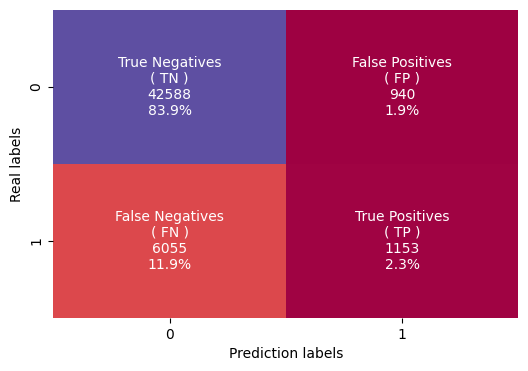

In [163]:
mi_cm(y_val, predictions)

### Resultados del modelo con las clases no balanceadas

In [166]:
print(my_accuracy(y_val, predictions))

0.8621294544307789


In [167]:
print(my_recall(y_val, predictions))

0.15996115427302995


In [168]:
print(my_precision(y_val, predictions))

0.5508838987099857


In [169]:
print(my_f1_score(y_val, predictions))

0.24793033007203527


### Resultados del modelo con las clases balanceadas

In [172]:
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import cross_val_score 
from sklearn.metrics import make_scorer
#from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold 
from imblearn.pipeline import make_pipeline

def get_models_underoversampling():
  modelos, nombres = list(), list()

  #  RandOver
  modelos.append(RandomOverSampler())
  nombres.append('RandOver')

  #  TomekLinks
  modelos.append(TomekLinks())
  nombres.append('TomekLinks')

  #  SMOTE
  modelos.append(SMOTE())
  nombres.append('SMOTE')

  # SMOTEENN
  modelos.append(SMOTEENN())
  nombres.append('SMOTEENN')

  return modelos, nombres

In [173]:
modelosOU, nombres = get_models_underoversampling()       
resultados = list()

for i in range(len(modelosOU)):

  model = LogisticRegression(class_weight='balanced')    
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  pipe = make_pipeline((modelosOU[i]), (model))


  metrics = {'accuracy': make_scorer(my_accuracy), 
                 'recall': make_scorer(my_recall), 
                 'f1_score': make_scorer(my_f1_score)
                 }


  resultadosOU = cross_validate(pipe,
                                X_train, y_train,
                                scoring=metrics,
                                cv=kfold)

  resultados.append(resultadosOU) 
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1_score: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_accuracy']),
                                                                          np.std(resultadosOU['test_accuracy']), 
                                                                          np.mean(resultadosOU['test_recall']),
                                                                          np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_f1_score']),
                                                                          np.std(resultadosOU['test_f1_score']),  
                                                                          ))


RandOver:
mean Accuracy: 0.732 (0.0018)
mean Recall: 0.771 (0.0061)
mean F1_score: 0.444 (0.0023)

TomekLinks:
mean Accuracy: 0.728 (0.0017)
mean Recall: 0.779 (0.0057)
mean F1_score: 0.442 (0.0023)

SMOTE:
mean Accuracy: 0.724 (0.0018)
mean Recall: 0.745 (0.0050)
mean F1_score: 0.429 (0.0024)

SMOTEENN:
mean Accuracy: 0.685 (0.0024)
mean Recall: 0.820 (0.0033)
mean F1_score: 0.419 (0.0022)



In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score


# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_val)

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)

print(f"Accuracy of Random Forest model: {accuracy * 100:.2f}%")
print(f"Recall of Random Forest model: {recall * 100:.2f}%")
print(f"F1 of Random Forest model: {f1 * 100:.2f}%")
print(f"Precision of Random Forest model: {precision * 100:.2f}%")


Accuracy of Random Forest model: 85.63%
Recall of Random Forest model: 16.72%
F1 of Random Forest model: 24.85%
Precision of Random Forest model: 48.35%


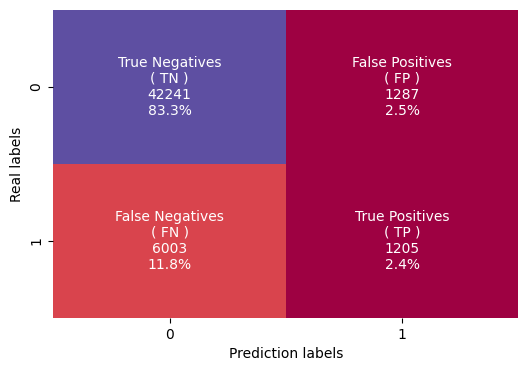

In [175]:
mi_cm(y_val, y_pred)

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Assuming X is the feature set and y is the target variable
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_converted.drop('Diabetes_binary', axis='columns'), df_converted['Diabetes_binary'], test_size=0.2, random_state=42)

# Define the parameter grid to search through
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Train the model with the best parameters
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with the best parameters: {accuracy * 100:.2f}%")
print(f"Recall of Random Forest model: {recall * 100:.2f}%")
print(f"F1 of Random Forest model: {f1 * 100:.2f}%")
print(f"Precision of Random Forest model: {precision * 100:.2f}%")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.4s
[CV] END max_depth=5, min_samples_leaf

In [ ]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, min_samples_split=5, min_samples_leaf=1)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_val)

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)

print(f"Accuracy of Random Forest model: {accuracy * 100:.2f}%")
print(f"Recall of Random Forest model: {recall * 100:.2f}%")
print(f"F1 of Random Forest model: {f1 * 100:.2f}%")
print(f"Precision of Random Forest model: {precision * 100:.2f}%")

In [179]:
modelosOU, nombres = get_models_underoversampling()       
resultados = list()

for i in range(len(modelosOU)):

  model = RandomForestClassifier(n_estimators=200, random_state=42, min_samples_split=5, min_samples_leaf=1)
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  pipe = make_pipeline((modelosOU[i]), (model))


  metrics = {'accuracy': make_scorer(my_accuracy), 
                 'recall': make_scorer(my_recall), 
                 'f1_score': make_scorer(my_f1_score)
                 }


  resultadosOU = cross_validate(pipe,
                                X_train, y_train,
                                scoring=metrics,
                                cv=kfold)

  resultados.append(resultadosOU) 
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1_score: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_accuracy']),
                                                                          np.std(resultadosOU['test_accuracy']), 
                                                                          np.mean(resultadosOU['test_recall']),
                                                                          np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_f1_score']),
                                                                          np.std(resultadosOU['test_f1_score']),  
                                                                          ))


RandOver:
mean Accuracy: 0.842 (0.0021)
mean Recall: 0.331 (0.0071)
mean F1_score: 0.369 (0.0075)

TomekLinks:
mean Accuracy: 0.863 (0.0010)
mean Recall: 0.218 (0.0042)
mean F1_score: 0.307 (0.0050)

SMOTE:
mean Accuracy: 0.816 (0.0014)
mean Recall: 0.448 (0.0049)
mean F1_score: 0.405 (0.0041)

SMOTEENN:
mean Accuracy: 0.722 (0.0023)
mean Recall: 0.756 (0.0056)
mean F1_score: 0.432 (0.0033)

